<a href="https://colab.research.google.com/github/ivnizhnik/Data_Science_Project_A/blob/main/WorldHappinessReport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Source of data: data.world

from google.colab import drive
drive.mount('/content/drive')

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
df = pd.read_excel('/content/drive/MyDrive/Data_Science_Project_A/WHR20_DataForFigure2.1.xls')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900826,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


***First choice: dataset 1***

**1) Source of data:** Data World 2020

**2) Brief description of data:** The dataset is the World Happiness Report 2020 by Data World. It consists of 20 columns/features and 153 rows (each row for a country) with zero missing data as well as zero duplicated rows. The brief statistical overview of the dataset provides a healthy start for data exploration and further analysis.

**3) What is the target?** The target (y) is the ladder score which is a proxy for happiness level on the scale of 0-10. The other features in the dataset includes things like GDP/capita, freedom levels, corruption levels, etc. all the variables that may impact happiness level.

**4) Is this a classification or regression problem?** This is originally a regression problem as y is continuous. But I also intend to create new features (e.g., less than 3 stands for low happiness).

**5) How many features?** 20 

**6) How many rows of data?** 153

**7) What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset?** I think the dataset provides opportunity to practice both regression models as well as classifications. Would be interesting to see if the insights coming out of the different approaches are directionally similar.

In [ ]:
df.shape  

(153, 20)

In [ ]:
df.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,153.00000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,5.47324,0.053538,5.578175,5.368304,9.295706,0.808721,64.445529,0.783360,-0.014568,0.733120,1.972317,0.868771,1.155607,0.692869,0.463583,0.189375,0.130718,1.972317
std,1.11227,0.018183,1.096823,1.128631,1.201588,0.121453,7.057848,0.117786,0.151809,0.175172,0.000000,0.372416,0.286866,0.254094,0.141172,0.100401,0.113097,0.563638
min,2.56690,0.025902,2.628270,2.505530,6.492642,0.319460,45.200001,0.396573,-0.300907,0.109784,1.972317,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.257241
25%,4.72410,0.040698,4.826248,4.603149,8.350645,0.737217,58.961712,0.714839,-0.127015,0.683019,1.972317,0.575862,0.986718,0.495443,0.381457,0.115006,0.055805,1.629928
50%,5.51500,0.050606,5.607728,5.430644,9.456313,0.829204,66.305145,0.799805,-0.033665,0.783122,1.972317,0.918549,1.203987,0.759818,0.483293,0.176745,0.098435,2.046272
75%,6.22850,0.060677,6.363886,6.138881,10.265124,0.906747,69.289192,0.877709,0.085429,0.849151,1.972317,1.169229,1.387139,0.867249,0.576665,0.255510,0.163064,2.350267
max,7.80870,0.120590,7.869766,7.747634,11.450681,0.974670,76.804581,0.974998,0.560664,0.935585,1.972317,1.536676,1.547567,1.137814,0.693270,0.569814,0.533162,3.440810


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                153 non-null    object 
 1   Regional indicator                          153 non-null    object 
 2   Ladder score                                153 non-null    float64
 3   Standard error of ladder score              153 non-null    float64
 4   upperwhisker                                153 non-null    float64
 5   lowerwhisker                                153 non-null    float64
 6   Logged GDP per capita                       153 non-null    float64
 7   Social support                              153 non-null    float64
 8   Healthy life expectancy                     153 non-null    float64
 9   Freedom to make life choices                153 non-null    float64
 10  Generosity    

Checking for missing values

In [ ]:
df.isnull().sum()

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

Checking for duplicates

In [ ]:
df.duplicated().sum()

0

Checking and correcting inconsistencies

In [ ]:
df['Country name'].value_counts()

Croatia     1
Bulgaria    1
Laos        1
Botswana    1
Portugal    1
           ..
Romania     1
Poland      1
Italy       1
Denmark     1
Chile       1
Name: Country name, Length: 153, dtype: int64

In [ ]:
df['Regional indicator'].value_counts()

Sub-Saharan Africa                    39
Western Europe                        21
Latin America and Caribbean           21
Middle East and North Africa          17
Central and Eastern Europe            17
Commonwealth of Independent States    12
Southeast Asia                         9
South Asia                             7
East Asia                              6
North America and ANZ                  4
Name: Regional indicator, dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

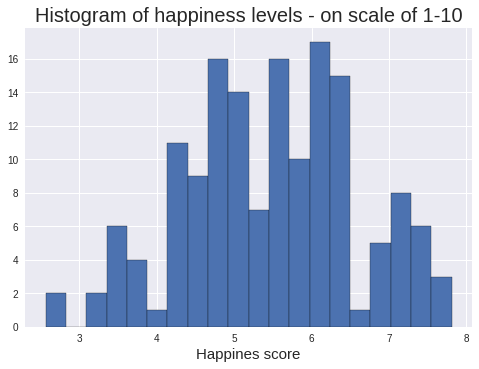

In [ ]:
plt.style.use('seaborn')
df['Ladder score'].hist(bins=20, edgecolor='black');
plt.title('Histogram of happiness levels - on scale of 1-10', fontsize = 20)
plt.xlabel('Happines score', fontsize = 15)
# plt.grid(False)
# plt.axis('off')
plt.show()


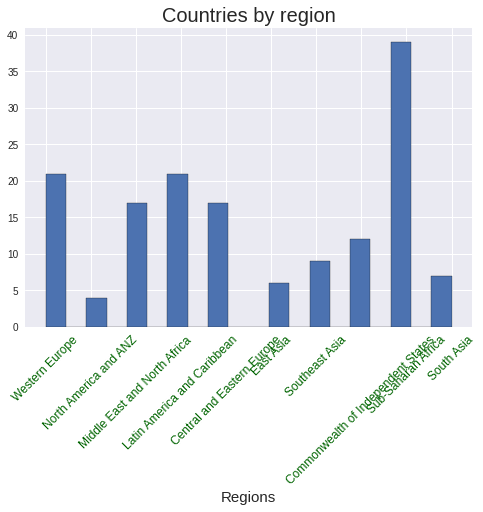

In [ ]:
df['Regional indicator'].hist(bins=20, edgecolor='black');
plt.title('Countries by region', fontsize = 20)
plt.xlabel('Regions', fontsize = 15)
plt.xticks(rotation = 45, fontsize = 12, c = 'darkgreen')
plt.show()

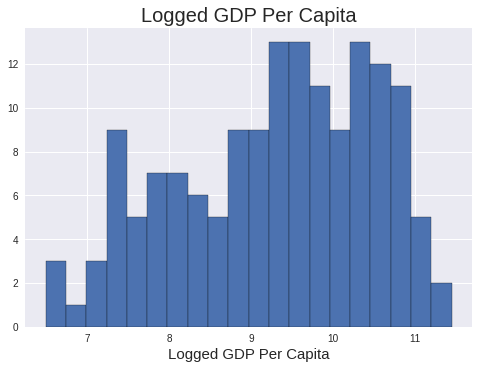

In [ ]:
df['Logged GDP per capita'].hist(bins=20, edgecolor='black');
plt.title('Logged GDP Per Capita', fontsize = 20)
plt.xlabel('Logged GDP Per Capita', fontsize = 15)
plt.show()

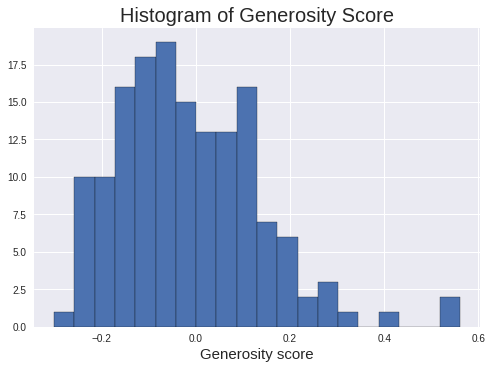

In [ ]:
df['Generosity'].hist(bins=20, edgecolor='black');
plt.title('Histogram of Generosity Score', fontsize = 20)
plt.xlabel('Generosity score', fontsize = 15)
plt.show()

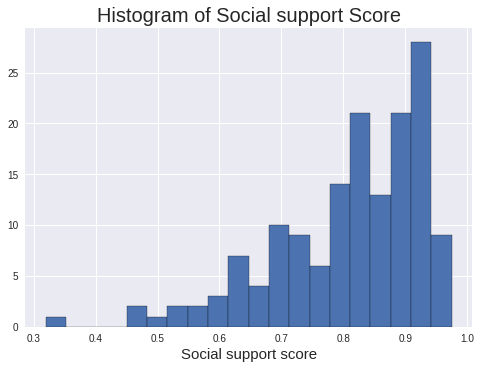

In [ ]:
df['Social support'].hist(bins=20, edgecolor='black');
plt.title('Histogram of Social support Score', fontsize = 20)
plt.xlabel('Social support score', fontsize = 15)
plt.show()

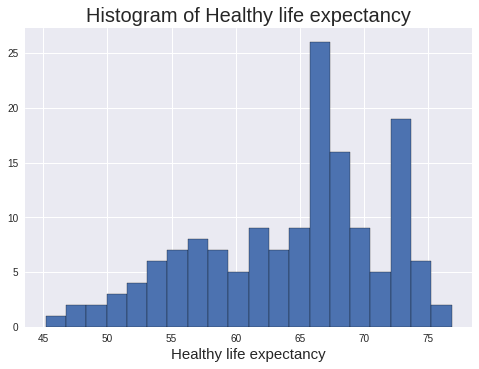

In [ ]:
df['Healthy life expectancy'].hist(bins=20, edgecolor='black');
plt.title('Histogram of Healthy life expectancy', fontsize = 20)
plt.xlabel('Healthy life expectancy', fontsize = 15)
plt.show()

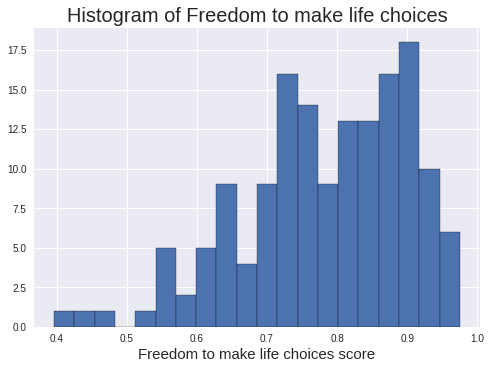

In [ ]:
df['Freedom to make life choices'].hist(bins=20, edgecolor='black');
plt.title('Histogram of Freedom to make life choices', fontsize = 20)
plt.xlabel('Freedom to make life choices score', fontsize = 15)
plt.show()

In [ ]:
# Now getting the ranges and min/max/median/average numbers
df.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,153.00000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,5.47324,0.053538,5.578175,5.368304,9.295706,0.808721,64.445529,0.783360,-0.014568,0.733120,1.972317,0.868771,1.155607,0.692869,0.463583,0.189375,0.130718,1.972317
std,1.11227,0.018183,1.096823,1.128631,1.201588,0.121453,7.057848,0.117786,0.151809,0.175172,0.000000,0.372416,0.286866,0.254094,0.141172,0.100401,0.113097,0.563638
min,2.56690,0.025902,2.628270,2.505530,6.492642,0.319460,45.200001,0.396573,-0.300907,0.109784,1.972317,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.257241
25%,4.72410,0.040698,4.826248,4.603149,8.350645,0.737217,58.961712,0.714839,-0.127015,0.683019,1.972317,0.575862,0.986718,0.495443,0.381457,0.115006,0.055805,1.629928
50%,5.51500,0.050606,5.607728,5.430644,9.456313,0.829204,66.305145,0.799805,-0.033665,0.783122,1.972317,0.918549,1.203987,0.759818,0.483293,0.176745,0.098435,2.046272
75%,6.22850,0.060677,6.363886,6.138881,10.265124,0.906747,69.289192,0.877709,0.085429,0.849151,1.972317,1.169229,1.387139,0.867249,0.576665,0.255510,0.163064,2.350267
max,7.80870,0.120590,7.869766,7.747634,11.450681,0.974670,76.804581,0.974998,0.560664,0.935585,1.972317,1.536676,1.547567,1.137814,0.693270,0.569814,0.533162,3.440810


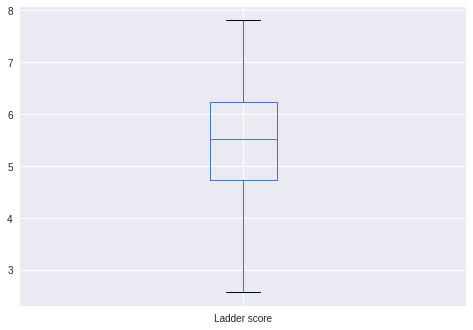

In [ ]:
# Adding some box plots to visualize the ranges
df.boxplot(column='Ladder score');

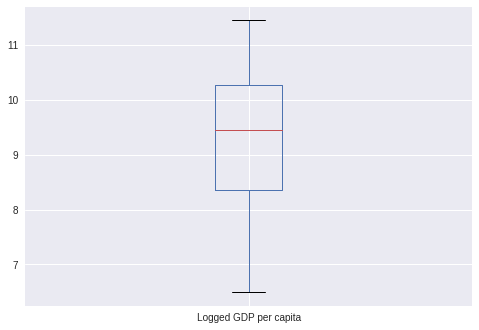

In [ ]:
df.boxplot(column='Logged GDP per capita');

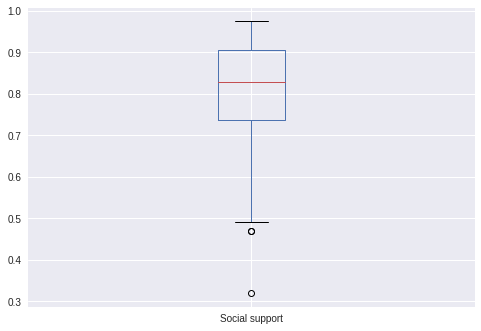

In [ ]:
df.boxplot(column='Social support');

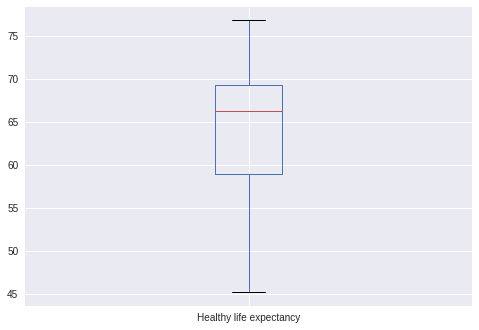

In [ ]:
df.boxplot(column='Healthy life expectancy');

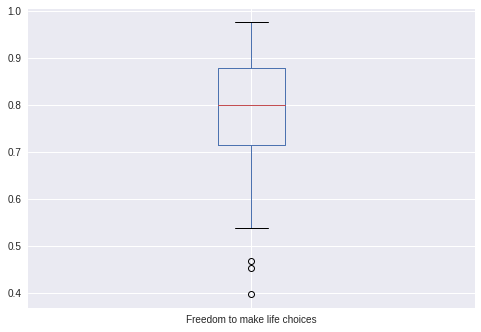

In [ ]:
df.boxplot(column='Freedom to make life choices');

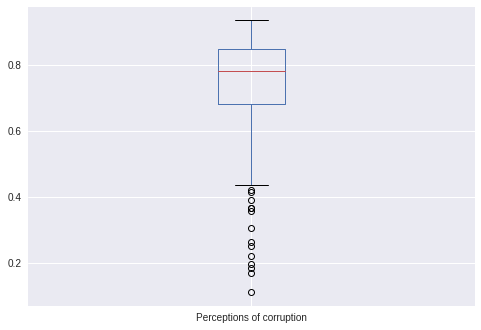

In [ ]:
df.boxplot(column='Perceptions of corruption');

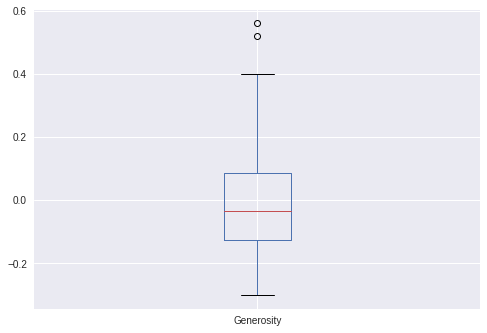

In [ ]:
df.boxplot(column='Generosity');

The correlation heatmap shows a number of important relationships:
- Very high correlation between happines score (Ladder Score) and Social support levels, GDP Per Capita, Healthy life expectency, Freedom to make life choices
- Not a very high correlation between Ladder Score and Generosity or Perception of Corruption
- Some of the features also show significant correlation with each other, for example, social support levels with GDP Per Capita

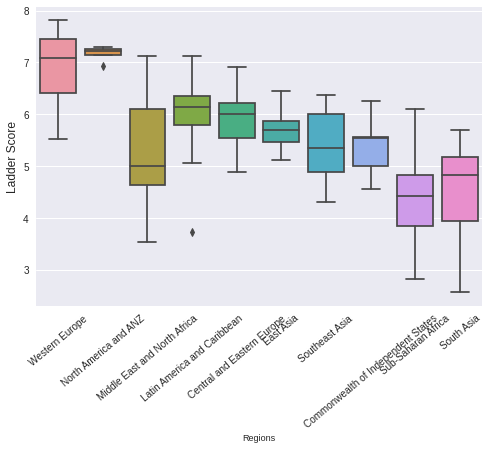

In [ ]:
sns.boxplot(x='Regional indicator', y='Ladder score', data=df)
plt.xticks(rotation = 40);
plt.xlabel('Regions', fontsize = 9);
plt.ylabel('Ladder Score', fontsize = 12);

Significant difference in happiness scores by region.

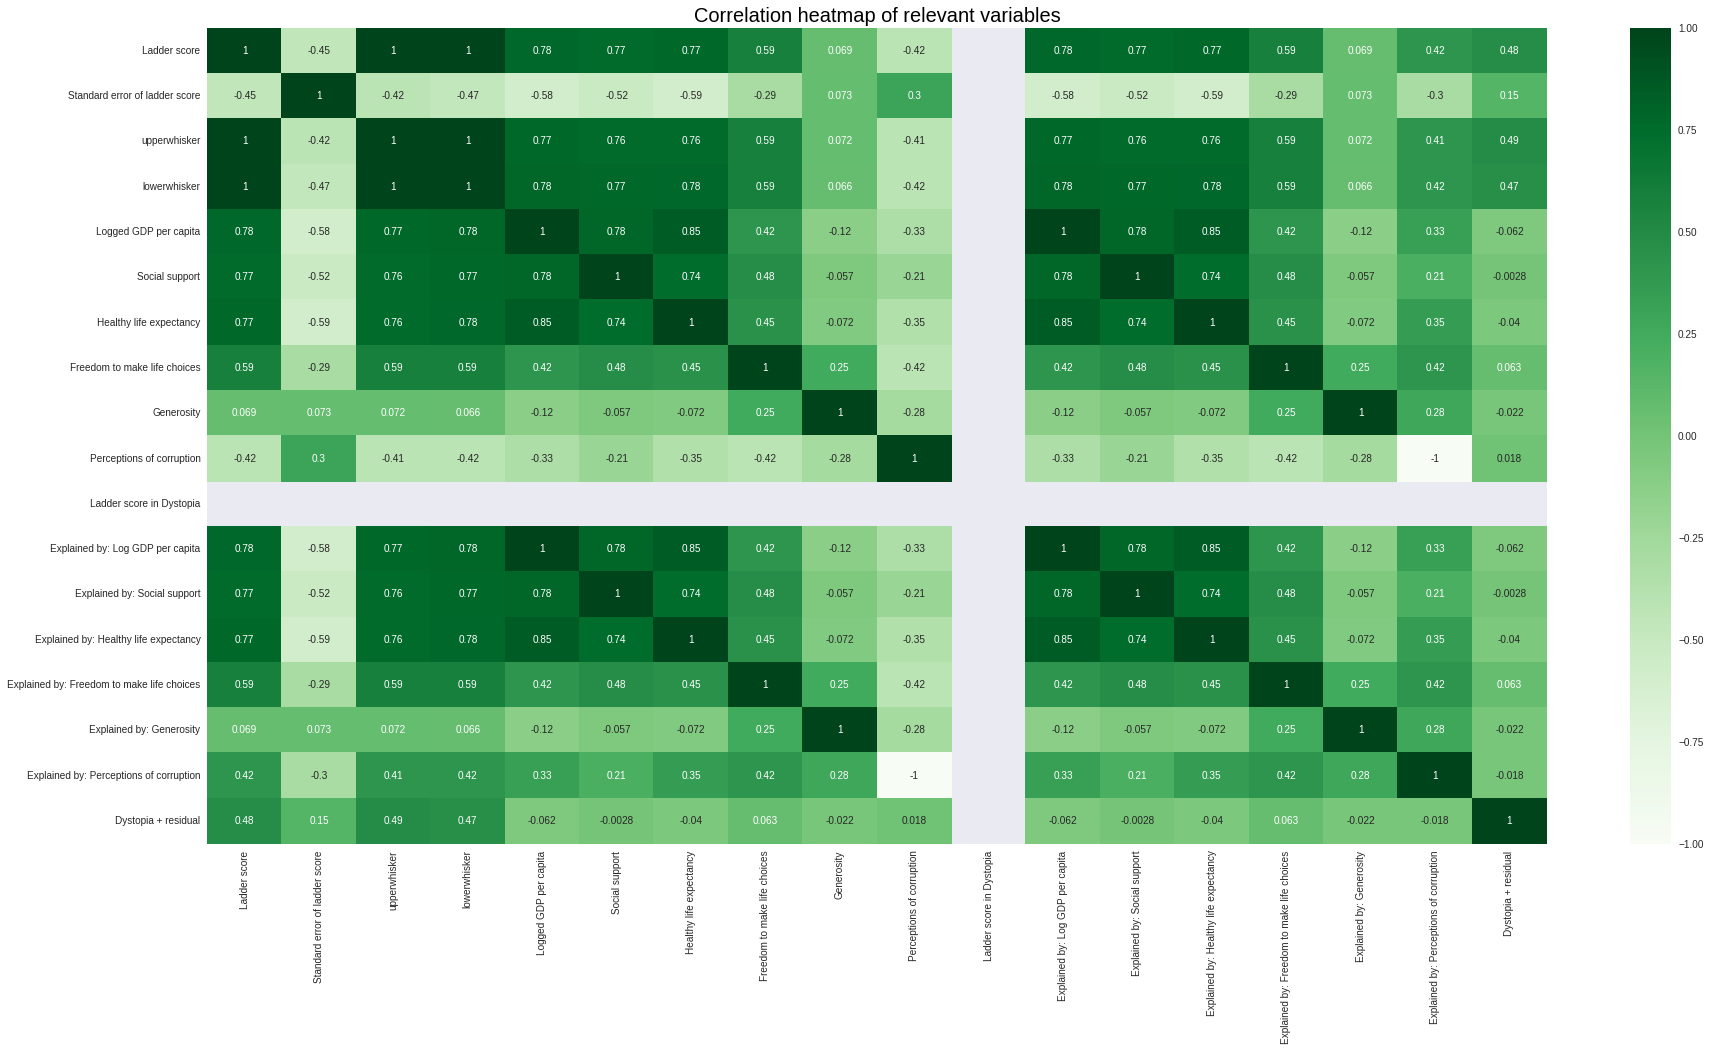

In [ ]:
# Running a heatmap of correlations to check for high areas of correlation
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (30, 15))
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True);
plt.title('Correlation heatmap of relevant variables', fontsize = 20, c='k');

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                153 non-null    object 
 1   Regional indicator                          153 non-null    object 
 2   Ladder score                                153 non-null    float64
 3   Standard error of ladder score              153 non-null    float64
 4   upperwhisker                                153 non-null    float64
 5   lowerwhisker                                153 non-null    float64
 6   Logged GDP per capita                       153 non-null    float64
 7   Social support                              153 non-null    float64
 8   Healthy life expectancy                     153 non-null    float64
 9   Freedom to make life choices                153 non-null    float64
 10  Generosity    

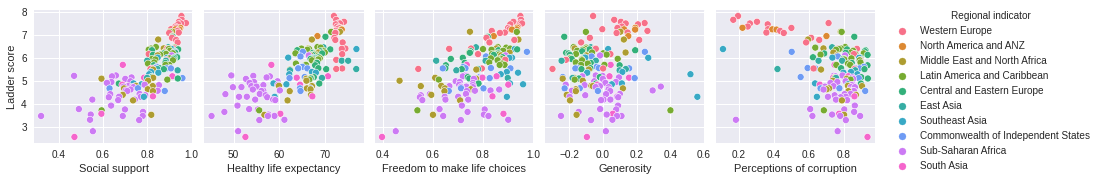

In [ ]:
# This is a neat way to get a quick scatterplot between each of your features and the target 
sns.pairplot(df,
             x_vars = ['Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption'],
             y_vars = ['Ladder score'],
             hue = 'Regional indicator');

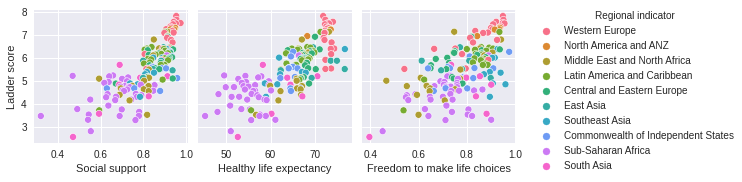

In [ ]:
# This is a neat way to get a quick scatterplot between each of your features and the target 
sns.pairplot(df,
             x_vars = ['Social support', 'Healthy life expectancy', 'Freedom to make life choices'],
             y_vars = ['Ladder score'],
             hue = 'Regional indicator');

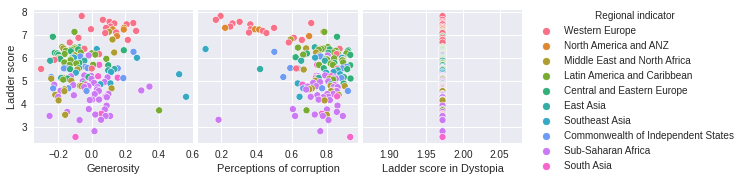

In [ ]:
# This is a neat way to get a quick scatterplot between each of your features and the target 
sns.pairplot(df,
             x_vars = ['Generosity', 'Perceptions of corruption', 'Ladder score in Dystopia'],
             y_vars = ['Ladder score'],
             hue = 'Regional indicator');

Deleting unnecessary features. In this case, "country name", "Standard error of ladder score," "upperwhisker," and "lowerwhisker" appear irrelevant for our future analysis. As such, these features should be deleted from the above dataset for the future more precise models evaluation.

In [ ]:
del df['Country name']
del df['Standard error of ladder score']
del df['upperwhisker'] 
del df['lowerwhisker']
del df['Explained by: Log GDP per capita']
del df['Explained by: Social support']
del df['Explained by: Healthy life expectancy']
del df['Explained by: Freedom to make life choices']
del df['Explained by: Generosity']
del df['Explained by: Perceptions of corruption']
df.head()

,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Dystopia + residual
0,Western Europe,7.8087,10.639267,0.954330,71.900826,0.949172,-0.059482,0.195445,1.972317,2.762835
1,Western Europe,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,2.432741
2,Western Europe,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,2.350267
3,Western Europe,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,2.460688
4,Western Europe,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,2.168266


Also, dropping the column Ladder Score in Dystopia, as it's the same for all observations with 0 std

In [ ]:
del df['Ladder score in Dystopia']
del df['Dystopia + residual']

In [ ]:
df['Regional indicator'].value_counts()

Sub-Saharan Africa                    39
Western Europe                        21
Latin America and Caribbean           21
Middle East and North Africa          17
Central and Eastern Europe            17
Commonwealth of Independent States    12
Southeast Asia                         9
South Asia                             7
East Asia                              6
North America and ANZ                  4
Name: Regional indicator, dtype: int64

In [ ]:
# 1) Transform the categorical variable (Regional indicator) by dummy encoding it.
# Pandas get_dummies
ohe_df = pd.get_dummies(df, columns = ['Regional indicator'], drop_first=True)

In [ ]:
ohe_df.head()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Regional indicator_Commonwealth of Independent States,Regional indicator_East Asia,Regional indicator_Latin America and Caribbean,Regional indicator_Middle East and North Africa,Regional indicator_North America and ANZ,Regional indicator_South Asia,Regional indicator_Southeast Asia,Regional indicator_Sub-Saharan Africa,Regional indicator_Western Europe
0,7.8087,10.639267,0.954330,71.900826,0.949172,-0.059482,0.195445,0,0,0,0,0,0,0,0,1
1,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,0,0,0,0,0,0,0,0,1
2,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,0,0,0,0,0,0,0,0,1
3,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,0,0,0,0,0,0,0,0,1
4,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,0,0,0,0,0,0,0,0,1


In [ ]:
ohe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 16 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Ladder score                                           153 non-null    float64
 1   Logged GDP per capita                                  153 non-null    float64
 2   Social support                                         153 non-null    float64
 3   Healthy life expectancy                                153 non-null    float64
 4   Freedom to make life choices                           153 non-null    float64
 5   Generosity                                             153 non-null    float64
 6   Perceptions of corruption                              153 non-null    float64
 7   Regional indicator_Commonwealth of Independent States  153 non-null    uint8  
 8   Regional indicator_East Asia                      

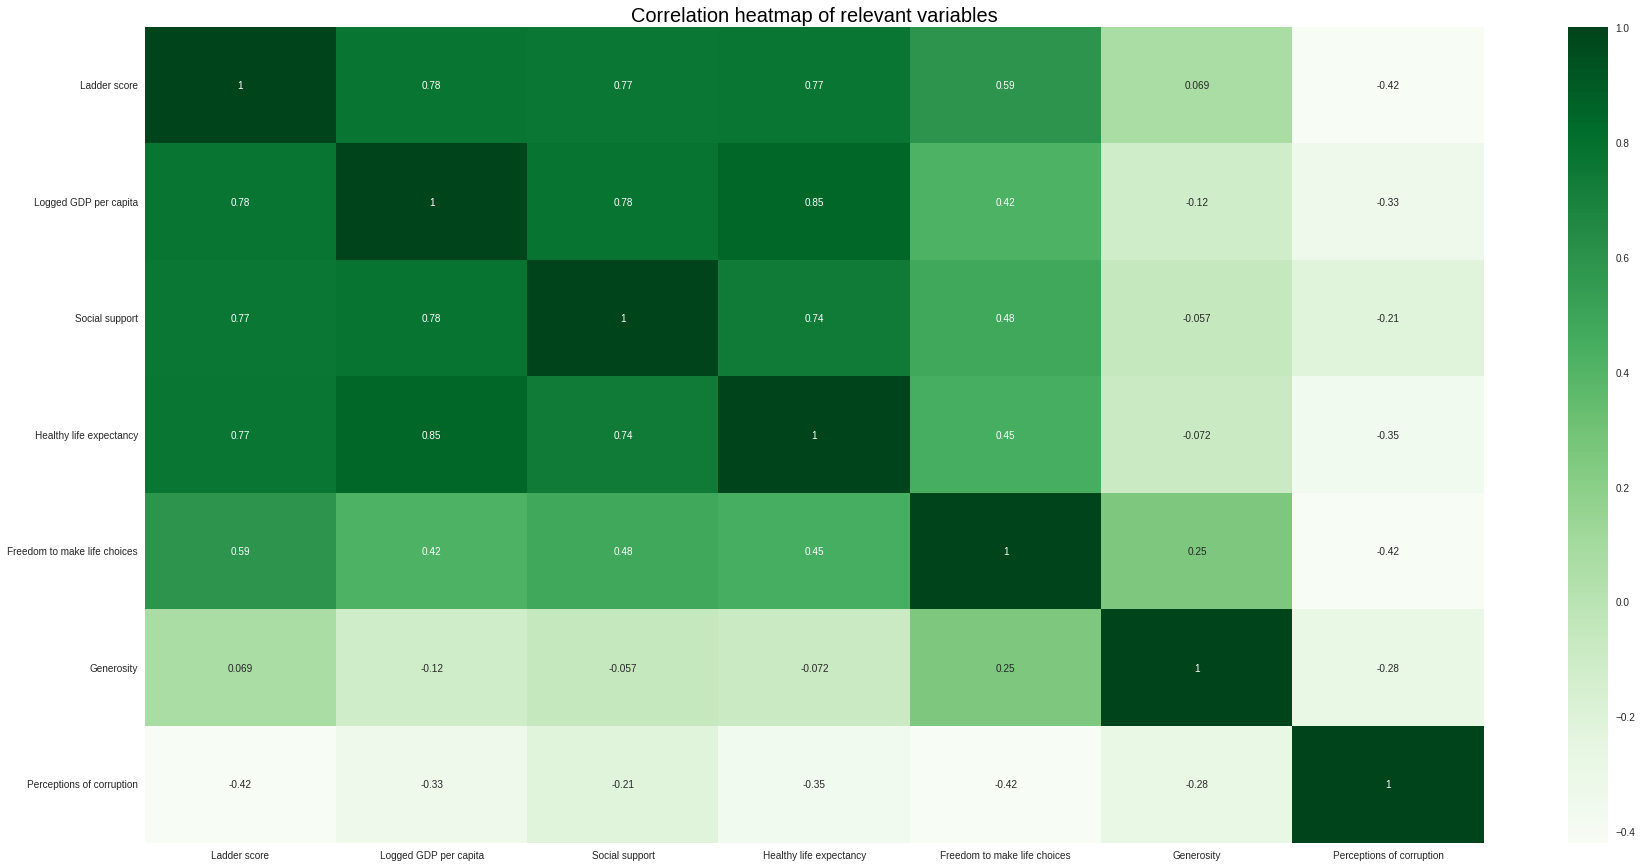

In [ ]:
# Running a heatmap of correlations to check for high areas of correlation
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (30, 15))
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True);
plt.title('Correlation heatmap of relevant variables', fontsize = 20, c='k');

Judging by updated correlations, social support, healthy life expectency, and GDP/capital seem to have the highest correlation with happiness score.



**Next, the model development phase is applied:**

- First, multiple models are applied with tuning the hyperparameters of each model to optimize model perfromance. I plan to run OLS Regression, Decision Tree, Bagged Tree, and Random Forest
- Second, evaluation of models is performed
- Third, I will select the optimal model based on performance with the test data


In [ ]:
# Identify target vector and features matrix
X = ohe_df.drop(columns = 'Ladder score')
y = ohe_df['Ladder score']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 15 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Logged GDP per capita                                  153 non-null    float64
 1   Social support                                         153 non-null    float64
 2   Healthy life expectancy                                153 non-null    float64
 3   Freedom to make life choices                           153 non-null    float64
 4   Generosity                                             153 non-null    float64
 5   Perceptions of corruption                              153 non-null    float64
 6   Regional indicator_Commonwealth of Independent States  153 non-null    uint8  
 7   Regional indicator_East Asia                           153 non-null    uint8  
 8   Regional indicator_Latin America and Caribbean    

In [ ]:
X.shape

(153, 15)

In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [ ]:
len(X_train)

114

In [ ]:
len(X_test)

39

In [ ]:
len(y_train)

114

In [ ]:
len(y_test)

39

**Linear Regression:**

In [ ]:
# Step 1: 
# Import the model - LinearRegression

from sklearn.linear_model import LinearRegression

In [ ]:
# Step 2: 
# Make an instance of the Model- Make a linear regression instance
reg = LinearRegression()

In [ ]:
# Step 3: 
# Train the model on your training data. This is the step where the model "learns" about the relationship between the features and target.  

# Model is learning the relationship between X and y
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Step 4: 
# Make predictions based on your model

# or to predict all values on the training data
train_preds = reg.predict(X_train)

# predict the values in the test set
test_preds = reg.predict(X_test)

In [ ]:
train_score = reg.score(X_train, y_train)
print(train_score)

0.8252100967786731


In [ ]:
test_score = reg.score(X_test, y_test)
print(test_score)

0.6323786322792767


In [ ]:
# Regression Metrics 
# import

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
print('Training RMSE:', np.sqrt(mean_squared_error(y_train, reg.predict(X_train))))
print('Testing RMSE:', np.sqrt(mean_squared_error(y_test, reg.predict(X_test))))

Training RMSE: 0.48528187528504174
Testing RMSE: 0.5566478578427676


In [ ]:
print('Coef:', reg.coef_)
print('Intercept:', reg.intercept_)

Coef: [ 0.23592702  2.07217185  0.02962094  1.67565633  1.05161738 -0.33054152
 -0.19308059 -0.31644872  0.26693883 -0.29614106  0.32453952 -0.88094912
 -0.582143   -0.28426205  0.36992543]
Intercept: -1.2788241190965106


**Observation:** Linear Regression appears to be providing a modest of level of preditability. Let's see if we can do better with the other models.

**Decision Tree:**

In [ ]:
# Step 1: Import the model we want to analyze. In this case: from sklearn.tree import DecisionTreeRegressor has been imported above (see above)

# Step 2: Now, we have to make an instance of the Model
# In this case: 1) Run a regression tree model with default parameters (unlimited depth)

In [ ]:
dec_tree = DecisionTreeRegressor()

In [ ]:
# Step 3: Fit the model using our training data.  
# The model is learning the relationship between the features (X) and the target (y).
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
# Step 4: Predicting the target values for the training & test test.
train_preds = dec_tree.predict(X_train)
test_preds = dec_tree.predict(X_test)

In [ ]:
# Step 5: Evaluate the Model
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)
print(train_score)
print(test_score)

1.0
0.5075743397417192


In [ ]:
# Step 6: Tune the Model

In [ ]:
# Looking at several options for tuning this model
dec_tree

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
# The depth of our default tree is:
dec_tree.get_depth()

14

In [ ]:
# The number of leaf nodes:
dec_tree.get_n_leaves()

114

In [ ]:
# 3) Optimize the max_depth based on the R2 score.
# Let's go extreme and set our max depth to 2
dec_tree_2 = DecisionTreeRegressor(max_depth = 2, random_state = 42)
dec_tree_2.fit(X_train, y_train)
train_2_score = dec_tree_2.score(X_train, y_train)
test_2_score = dec_tree_2.score(X_test, y_test)
print(train_2_score)
print(test_2_score)

0.7154869572732739
0.6238098436362429


**Observation:** With a max-depth of 2, we improve the test model power to 62%. Let's tune more.

In [ ]:
dec_tree_6 = DecisionTreeRegressor(max_depth =3, random_state = 42)
dec_tree_6.fit(X_train, y_train)
train_6_score = dec_tree_6.score(X_train, y_train)
test_6_score = dec_tree_6.score(X_test, y_test)
print(train_6_score)
print(test_6_score)

0.8185491420578473
0.7384371405500547


**Observation:** Testing different max depths, it appears max depth of 3 gives us the best result (81% for training model, 74% for the test data). Next we will confirm with a chart of max depth vs. R2.

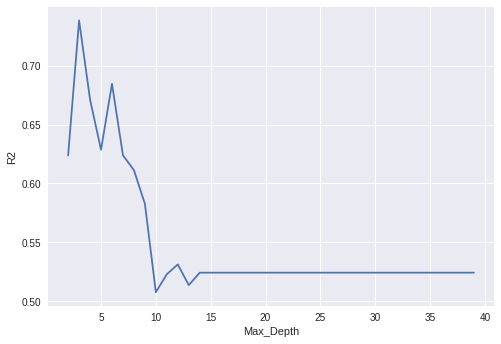

In [ ]:
max_depth_range = list(range(2, 40)) # will try every value between 2 and 36
# List to store the score for each value of max_depth:
r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    dec_tree.fit(X_train, y_train)
    score = dec_tree.score(X_test, y_test)
    r2.append(score)

plt.plot(max_depth_range, r2)
plt.xlabel('Max_Depth')
plt.ylabel('R2');

The chart confirms max depth of 3 is most optimal.

**Bagged tree regressor:**


In [ ]:
# Importing the bagging regressor
from sklearn.ensemble import BaggingRegressor

In [ ]:
# Split the data for validation
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
bagreg = BaggingRegressor(random_state = 42)

In [ ]:
bagreg

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=42, verbose=0,
                 warm_start=False)

In [ ]:
bagreg.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=42, verbose=0,
                 warm_start=False)

In [ ]:
bagreg.predict(X_test)

array([4.09807999, 5.87075005, 4.31583996, 4.86236997, 6.28177991,
       4.05552001, 5.66132503, 6.23014002, 6.12564001, 7.19808002,
       6.68287992, 6.99076004, 7.07072992, 6.09492011, 5.17036996,
       4.75992999, 4.66764998, 4.55247002, 4.99197993, 4.69433997,
       6.07181993, 4.51636996, 5.95275006, 5.98044996, 5.80424991,
       6.94745994, 6.33221006, 4.24431005, 4.84899998, 6.04084997,
       4.18095005, 5.36928997, 5.17793002, 6.68636994, 5.87872992,
       5.73920999, 7.26592007, 4.07312   , 4.78743997])

In [ ]:
bagreg_train_score = bagreg.score(X_train, y_train)
bagreg_test_score = bagreg.score(X_test, y_test)
print(bagreg_train_score)
print(bagreg_test_score)

0.9526959211772196
0.7292047083228952


**Observation:** Bagged regression is performing very close to Decision Tree already (~73% vs. 74%). Let's see if we can improve it with some fine tuning.

In [ ]:
bagreg2 = BaggingRegressor(n_estimators=130, random_state = 42)
bagreg2.fit(X_train, y_train)
bagreg2_train_score = bagreg2.score(X_train, y_train)
bagreg2_test_score = bagreg2.score(X_test, y_test)
print(bagreg2_train_score)
print(bagreg2_test_score)

0.968926674698064
0.7600936923584014


Changing n_estimators improved the model a bit (from 73% on test data to 76%)

**Random forest regression:**

In [ ]:
# importing the library
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(random_state = 42)

In [ ]:
rf

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
rf.predict(X_test)

array([4.27073897, 5.92284803, 4.43611898, 4.75187597, 6.0798071 ,
       4.43121094, 5.78259722, 6.02581499, 6.163492  , 7.23877902,
       6.59733799, 6.87257199, 7.11105496, 6.08281202, 5.12652797,
       5.10735499, 4.53263704, 4.41095001, 4.88228091, 4.53217531,
       6.07272194, 4.357693  , 5.93701663, 6.04733397, 5.91938101,
       7.15249094, 6.232692  , 4.23611897, 4.63785995, 6.07226301,
       4.174668  , 5.45882601, 5.23357485, 6.51735899, 5.98203899,
       5.66637702, 7.22426301, 4.190004  , 4.66292428])

In [ ]:
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print(rf_train_score)
print(rf_test_score)

0.9687995657632353
0.7634383056518048


Let's look at the most important features of the model.

<BarContainer object of 15 artists>

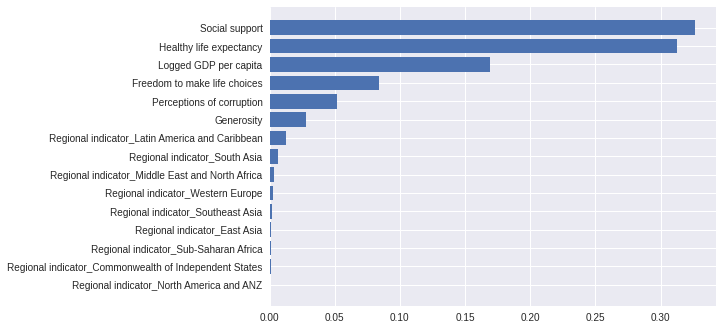

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1)
randomforest_features = pd.DataFrame({'feature' : X_train.columns, 'feature_importance' : rf.feature_importances_})
randomforest_features.sort_values(by = 'feature_importance', inplace = True)
plt.barh(randomforest_features['feature'], randomforest_features['feature_importance'])



Tuning the model, starting with adjusting max depth

In [ ]:
rf_tuned = RandomForestRegressor(max_depth = 4, n_estimators=200, random_state = 42)
rf_tuned.fit(X_train, y_train)
rf_tuned_train_score = rf_tuned.score(X_train, y_train)
rf_tuned_test_score = rf_tuned.score(X_test, y_test)
print(rf_tuned_train_score)
print(rf_tuned_test_score)

0.9171246838326851
0.7718843704060412


Tuning the model further, we are able to get to 77%.

**Conclusion - Few insights to note:**

- Random Forest Regressor seem to be providing the highest accuracy on the test data, so I will choose that as the main model. 
- Tuning in the Random Forest Regressor, by adjusting max_depth and n_estimators, we were able to get to 77% in the test data set
- When we look at which features have the highest impact on happiness score, social support and healthy life expectency followed by GDP/Capital are the three most important contributors



**Additional note:** separately and independent from this, I have been thinking about running additional analyses by converting the happiness score into a categorical variable (0-6 scores as the first category and >6 as the second category for a "happy countries vs. rest" type analysis) to do additional classification analysis. If I find interesting insights out of that exercise, I may include some of them also in my final (Part 5) presentation.